Author: <font color="blue">Josep Monclús Carrasco</font>

E-mail: <font color="blue">josep.monclus01@estudiant.upf.edu</font>

Date: <font color="blue">29/11/2021</font>

In [2]:
import io
import nltk
import gzip
import random
import statistics
import secrets
import re

# 0. Dataset and how to iterate

In [3]:
# Leave this code as-is

INPUT_FILE = "data/DCEP-reports-en.txt.gz"

In [4]:
# Leave this code as-is

# Producer in Python that reads a filename by words
def read_by_words(filename, max_words=-1, report_every=-1):
    
    # Open the input file
    with gzip.open(INPUT_FILE, "rt", encoding='utf8') as file:
        
        # Initialize counter of words to stop at max_words
        counter = 0
    
        # Regular expression to identify words having 4 letters or more and beginning with a-z
        word_expr = re.compile('^[a-z][a-z0-9]{4,}$', re.IGNORECASE)

        # Iterate through lines in the file
        for line in file:
            
            if counter > max_words and max_words != -1:
                break
                
            for word in nltk.word_tokenize(line):
                if word_expr.match(word):
                    counter += 1
                    
                    # Report
                    if (report_every != -1) and (counter % report_every == 0):
                        if max_words == -1:
                            print("- Read %d words so far" % (counter))
                        else:
                            print("- Read %d/%d words so far" % (counter, max_words))

                    # Produce the word
                    yield word

In [5]:
# Leave this code as-is

# Iterate through the file
for word in read_by_words(INPUT_FILE, max_words=300000, report_every=100000):
    # Prints 0.005% of words
    if random.random() < 0.0001:
        print("Current word '%s'" % (word)) 

Current word 'Zeroing'
Current word 'companies'
Current word 'Treaty'
Current word 'meaning'
Current word 'resolution'
Current word 'Union'
Current word 'transformed'
Current word 'related'
Current word 'needed'
Current word 'proposed'
Current word 'fundamental'
Current word 'votes'
Current word 'remove'
Current word 'modes'
Current word 'activities'
Current word 'researchers'
- Read 100000/300000 words so far
Current word 'World'
Current word 'ensure'
Current word 'Europe'
Current word 'appropriate'
Current word 'opened'
Current word 'authority'
Current word 'supporting'
Current word 'between'
Current word 'exchange'
Current word 'citizens'
Current word 'stretch'
Current word 'Directive'
- Read 200000/300000 words so far
Current word 'availability'
Current word 'Commission'
Current word 'tabled'
Current word 'which'
Current word 'contents'
Current word 'looks'
Current word 'networks'
Current word 'account'
Current word 'strategy'
Current word 'processed'
Current word 'Siekierski'
- Re

# 1. Determine approximately the top-5 words

In [6]:
def add_to_reservoir(reservoir, item, max_reservoir_size):
    # YOUR CODE HERE
    #We add the elements with prob 1 until we arrive to the maximum
    if len(reservoir) < max_reservoir_size:
        reservoir.append(item)
    else:
        #We drop one element random
        reservoir.pop(random.randrange(0,max_reservoir_size))
        #And we add the new one
        reservoir.append(item)
    assert(len(reservoir) <= max_reservoir_size)
    

In [7]:
def reservoir_sampling(filename, reservoir_size, max_words=-1, report_every=-1):
    reservoir = []

    words_read = 0

    for word in read_by_words(filename, max_words=max_words, report_every=report_every):

            # YOUR CODE HERE
            #Add the probability
            if len(reservoir) < reservoir_size:
                add_to_reservoir(reservoir, word, reservoir_size)
            else:
                if random.uniform(0,1) >= (1 - reservoir_size/max_words):
                    add_to_reservoir(reservoir, word, reservoir_size)
            words_read += 1

    return (words_read, reservoir)

In [8]:
# Leave this code as-is

reservoir_size = 500
(items_seen, reservoir) = reservoir_sampling(INPUT_FILE, reservoir_size, max_words=300000, report_every=100000)

print("Number of items seen    : %d" % items_seen)
print("Number of items sampled : %d" % len(reservoir) )

- Read 100000/300000 words so far
- Read 200000/300000 words so far
- Read 300000/300000 words so far
Number of items seen    : 300007
Number of items sampled : 500


In [9]:
# Leave this code as-is

freq = {}
for item in reservoir:
    freq[item] = reservoir.count(item)

most_frequent_items = sorted([(frequency, word) for word, frequency in freq.items()], reverse=True)[:10]
for absolute_frequency, word in most_frequent_items:
    print("%d %s" % (absolute_frequency, word))

8 which
7 measures
7 Commission
6 international
6 Community
5 trade
5 Amendment
4 report
4 paragraph
4 States


In [10]:
most_frequent_items_rel = sorted([(frequency/len(reservoir)*100, word) for word, frequency in freq.items()], reverse=True)[:10]
for relative_frequency, word in most_frequent_items_rel:
    print("%.3f %s" % (relative_frequency, word))

1.600 which
1.400 measures
1.400 Commission
1.200 international
1.200 Community
1.000 trade
1.000 Amendment
0.800 report
0.800 paragraph
0.800 States


In [11]:
#Reservoir size 50
reservoir_size = 50
(items_seen, reservoir) = reservoir_sampling(INPUT_FILE, reservoir_size, max_words=300000, report_every=100000)
print()
freq = {}
for item in reservoir:
    freq[item] = reservoir.count(item)

most_frequent_items = sorted([(frequency*(items_seen/len(reservoir)), word) for word, frequency in freq.items()], reverse=True)[:10]
for estimate, word in most_frequent_items:
    print(" Estimate %.2f %s" % (estimate, word))

- Read 100000/300000 words so far
- Read 200000/300000 words so far
- Read 300000/300000 words so far

 Estimate 12000.28 against
 Estimate 6000.14 where
 Estimate 6000.14 using
 Estimate 6000.14 tools
 Estimate 6000.14 third
 Estimate 6000.14 safeguard
 Estimate 6000.14 researchers
 Estimate 6000.14 research
 Estimate 6000.14 representative
 Estimate 6000.14 report


In [12]:
#Reservoir size 200
reservoir_size = 200
(items_seen, reservoir) = reservoir_sampling(INPUT_FILE, reservoir_size, max_words=300000, report_every=100000)
print()
freq = {}
for item in reservoir:
    freq[item] = reservoir.count(item)

most_frequent_items = sorted([(frequency*(items_seen/len(reservoir)), word) for word, frequency in freq.items()], reverse=True)[:10]
for estimate, word in most_frequent_items:
    print(" Estimate %.2f %s" % (estimate, word))

- Read 100000/300000 words so far
- Read 200000/300000 words so far
- Read 300000/300000 words so far

 Estimate 9000.21 having
 Estimate 7500.18 European
 Estimate 6000.14 safeguard
 Estimate 6000.14 country
 Estimate 6000.14 Parliament
 Estimate 4500.11 which
 Estimate 4500.11 declaration
 Estimate 4500.11 annual
 Estimate 4500.11 Member
 Estimate 4500.11 Community


In [13]:
#Reservoir size 1000
reservoir_size = 1000
(items_seen, reservoir) = reservoir_sampling(INPUT_FILE, reservoir_size, max_words=300000, report_every=100000)
print()
freq = {}
for item in reservoir:
    freq[item] = reservoir.count(item)

most_frequent_items = sorted([(frequency*(items_seen/len(reservoir)), word) for word, frequency in freq.items()], reverse=True)[:10]
for estimate, word in most_frequent_items:
    print(" Estimate %.2f %s" % (estimate, word))

- Read 100000/300000 words so far
- Read 200000/300000 words so far
- Read 300000/300000 words so far

 Estimate 5400.13 Commission
 Estimate 3900.09 which
 Estimate 3900.09 European
 Estimate 3600.08 Community
 Estimate 3300.08 Justification
 Estimate 3000.07 trade
 Estimate 3000.07 measures
 Estimate 3000.07 Member
 Estimate 2400.06 rules
 Estimate 2400.06 number


In [14]:
#Reservoir size 2000
reservoir_size = 2000
(items_seen, reservoir) = reservoir_sampling(INPUT_FILE, reservoir_size, max_words=300000, report_every=100000)
print()
freq = {}
for item in reservoir:
    freq[item] = reservoir.count(item)

most_frequent_items = sorted([(frequency*(items_seen/len(reservoir)), word) for word, frequency in freq.items()], reverse=True)[:10]
for estimate, word in most_frequent_items:
    print(" Estimate %.2f %s" % (estimate, word))

- Read 100000/300000 words so far
- Read 200000/300000 words so far
- Read 300000/300000 words so far

 Estimate 5100.12 European
 Estimate 3750.09 which
 Estimate 3150.07 Community
 Estimate 3000.07 trade
 Estimate 3000.07 Commission
 Estimate 2700.06 measures
 Estimate 2400.06 Article
 Estimate 2100.05 countries
 Estimate 2100.05 Parliament
 Estimate 1950.05 States


In [15]:
#Reservoir size 40000
reservoir_size = 40000
(items_seen, reservoir) = reservoir_sampling(INPUT_FILE, reservoir_size, max_words=300000, report_every=100000)
print()
freq = {}
for item in reservoir:
    freq[item] = reservoir.count(item)

most_frequent_items = sorted([(frequency*(items_seen/len(reservoir)), word) for word, frequency in freq.items()], reverse=True)[:10]
for estimate, word in most_frequent_items:
    print(" Estimate %.2f %s" % (estimate, word))

- Read 100000/300000 words so far
- Read 200000/300000 words so far
- Read 300000/300000 words so far

 Estimate 4207.60 European
 Estimate 3675.09 Commission
 Estimate 2535.06 Parliament
 Estimate 2490.06 Council
 Estimate 2362.56 Article
 Estimate 2152.55 which
 Estimate 2085.05 should
 Estimate 1905.04 Member
 Estimate 1807.54 shall
 Estimate 1770.04 Amendment


In [16]:
#Reservoir size 20000
reservoir_size = 20000
(items_seen, reservoir) = reservoir_sampling(INPUT_FILE, reservoir_size, report_every=100000)
print()
freq = {}
for item in reservoir:
    freq[item] = reservoir.count(item)

most_frequent_items = sorted([(frequency*(items_seen/len(reservoir)), word) for word, frequency in freq.items()], reverse=True)[:10]
for estimate, word in most_frequent_items:
    print(" Estimate %.2f %s" % (estimate, word))

- Read 100000 words so far
- Read 200000 words so far
- Read 300000 words so far
- Read 400000 words so far
- Read 500000 words so far
- Read 600000 words so far
- Read 700000 words so far
- Read 800000 words so far
- Read 900000 words so far
- Read 1000000 words so far
- Read 1100000 words so far
- Read 1200000 words so far
- Read 1300000 words so far
- Read 1400000 words so far
- Read 1500000 words so far
- Read 1600000 words so far
- Read 1700000 words so far
- Read 1800000 words so far
- Read 1900000 words so far
- Read 2000000 words so far
- Read 2100000 words so far
- Read 2200000 words so far
- Read 2300000 words so far
- Read 2400000 words so far
- Read 2500000 words so far
- Read 2600000 words so far
- Read 2700000 words so far
- Read 2800000 words so far
- Read 2900000 words so far
- Read 3000000 words so far
- Read 3100000 words so far
- Read 3200000 words so far
- Read 3300000 words so far
- Read 3400000 words so far
- Read 3500000 words so far
- Read 3600000 words so far
-

As we can see with a 20000 number of items in the reservoir seems to arrives to a good aproximation, because with less european, parliament and article do not appear at the top

# 2. Determine approximately the distinct number of words

In [17]:
# Leave this code as-is

def count_trailing_zeroes(number):
    count = 0
    while number & 1 == 0:
        count += 1
        number = number >> 1
    return count

In [18]:
# Leave this code as-is

def random_hash_function():
    # We use a cryptographically safe generator for the salt of our hash function
    salt = secrets.token_bytes(32)
    return lambda string: hash(string + str(salt))

In [19]:
number_of_passes = 10
estimates = []

for i in range(number_of_passes):
    #We create the hash_function
    hash_function = random_hash_function()
    #We initialize R in minus infinite
    R = -float("inf")
    # YOUR_CODE_HERE: read the file and generate an estimate
    for word in read_by_words(INPUT_FILE, max_words=300000, report_every=100000):
        #We compute the hash value
        hash_value = hash_function(word)
        #We count the trailing zeros
        zeros = count_trailing_zeroes(hash_value)
        #If is greatter we update R
        if zeros > R:
            R = zeros
    #We compute the estimation
    estimate = 2**R
    estimates.append(estimate)
    print("Estimate on pass %d: %d distinct words" % (i+1, estimate))

- Read 100000/300000 words so far
- Read 200000/300000 words so far
- Read 300000/300000 words so far
Estimate on pass 1: 8192 distinct words
- Read 100000/300000 words so far
- Read 200000/300000 words so far
- Read 300000/300000 words so far
Estimate on pass 2: 65536 distinct words
- Read 100000/300000 words so far
- Read 200000/300000 words so far
- Read 300000/300000 words so far
Estimate on pass 3: 16384 distinct words
- Read 100000/300000 words so far
- Read 200000/300000 words so far
- Read 300000/300000 words so far
Estimate on pass 4: 4096 distinct words
- Read 100000/300000 words so far
- Read 200000/300000 words so far
- Read 300000/300000 words so far
Estimate on pass 5: 16384 distinct words
- Read 100000/300000 words so far
- Read 200000/300000 words so far
- Read 300000/300000 words so far
Estimate on pass 6: 262144 distinct words
- Read 100000/300000 words so far
- Read 200000/300000 words so far
- Read 300000/300000 words so far
Estimate on pass 7: 4096 distinct words
-

In [20]:
# Leave this code as-is

print("* Average of estimates: %.1f" % statistics.mean(estimates))
print("* Median  of estimates: %.1f" % statistics.median(estimates))

* Average of estimates: 40140.8
* Median  of estimates: 8192.0


In [21]:
number_of_passes = 10
medians = []
averages = []
for iter in range(3):
    estimates = []
    for i in range(number_of_passes):
        #We create the hash_function
        hash_function = random_hash_function()
        #We initialize R in minus infinite
        R = -float("inf")
        # YOUR_CODE_HERE: read the file and generate an estimate
        for word in read_by_words(INPUT_FILE, max_words=300000, report_every=100000):
            #We compute the hash value
            hash_value = hash_function(word)
            #We count the trailing zeros
            zeros = count_trailing_zeroes(hash_value)
            #If is greatter we update R
            if zeros > R:
                R = zeros
        #We compute the estimation
        estimate = 2**R
        estimates.append(estimate)
        print("Estimate on pass %d: %d distinct words" % (i+1, estimate))
    averages.append(statistics.mean(estimates))
    medians.append(statistics.median(estimates))
print("List of avgs",averages)
print("List of medians",medians)

- Read 100000/300000 words so far
- Read 200000/300000 words so far
- Read 300000/300000 words so far
Estimate on pass 1: 16384 distinct words
- Read 100000/300000 words so far
- Read 200000/300000 words so far
- Read 300000/300000 words so far
Estimate on pass 2: 4096 distinct words
- Read 100000/300000 words so far
- Read 200000/300000 words so far
- Read 300000/300000 words so far
Estimate on pass 3: 32768 distinct words
- Read 100000/300000 words so far
- Read 200000/300000 words so far
- Read 300000/300000 words so far
Estimate on pass 4: 524288 distinct words
- Read 100000/300000 words so far
- Read 200000/300000 words so far
- Read 300000/300000 words so far
Estimate on pass 5: 4096 distinct words
- Read 100000/300000 words so far
- Read 200000/300000 words so far
- Read 300000/300000 words so far
Estimate on pass 6: 16384 distinct words
- Read 100000/300000 words so far
- Read 200000/300000 words so far
- Read 300000/300000 words so far
Estimate on pass 7: 4096 distinct words
-

In [22]:
number_of_passes = 10
estimates = []

for i in range(number_of_passes):
    #We create the hash_function
    hash_function = random_hash_function()
    #We initialize R in minus infinite
    R = -float("inf")
    # YOUR_CODE_HERE: read the file and generate an estimate
    for word in read_by_words(INPUT_FILE, max_words=5000000, report_every=100000):
        #We compute the hash value
        hash_value = hash_function(word)
        #We count the trailing zeros
        zeros = count_trailing_zeroes(hash_value)
        #If is greatter we update R
        if zeros > R:
            R = zeros
    #We compute the estimation
    estimate = 2**R
    estimates.append(estimate)
    print("Estimate on pass %d: %d distinct words" % (i+1, estimate))
print()
print("* Average of estimates: %.1f" % statistics.mean(estimates))
print("* Median  of estimates: %.1f" % statistics.median(estimates))

- Read 100000/5000000 words so far
- Read 200000/5000000 words so far
- Read 300000/5000000 words so far
- Read 400000/5000000 words so far
- Read 500000/5000000 words so far
- Read 600000/5000000 words so far
- Read 700000/5000000 words so far
- Read 800000/5000000 words so far
- Read 900000/5000000 words so far
- Read 1000000/5000000 words so far
- Read 1100000/5000000 words so far
- Read 1200000/5000000 words so far
- Read 1300000/5000000 words so far
- Read 1400000/5000000 words so far
- Read 1500000/5000000 words so far
- Read 1600000/5000000 words so far
- Read 1700000/5000000 words so far
- Read 1800000/5000000 words so far
- Read 1900000/5000000 words so far
- Read 2000000/5000000 words so far
- Read 2100000/5000000 words so far
- Read 2200000/5000000 words so far
- Read 2300000/5000000 words so far
- Read 2400000/5000000 words so far
- Read 2500000/5000000 words so far
- Read 2600000/5000000 words so far
- Read 2700000/5000000 words so far
- Read 2800000/5000000 words so far
-

- Read 2600000/5000000 words so far
- Read 2700000/5000000 words so far
- Read 2800000/5000000 words so far
- Read 2900000/5000000 words so far
- Read 3000000/5000000 words so far
- Read 3100000/5000000 words so far
- Read 3200000/5000000 words so far
- Read 3300000/5000000 words so far
- Read 3400000/5000000 words so far
- Read 3500000/5000000 words so far
- Read 3600000/5000000 words so far
- Read 3700000/5000000 words so far
- Read 3800000/5000000 words so far
- Read 3900000/5000000 words so far
- Read 4000000/5000000 words so far
- Read 4100000/5000000 words so far
- Read 4200000/5000000 words so far
- Read 4300000/5000000 words so far
- Read 4400000/5000000 words so far
- Read 4500000/5000000 words so far
- Read 4600000/5000000 words so far
- Read 4700000/5000000 words so far
- Read 4800000/5000000 words so far
- Read 4900000/5000000 words so far
- Read 5000000/5000000 words so far
Estimate on pass 5: 16384 distinct words
- Read 100000/5000000 words so far
- Read 200000/5000000 wo

- Read 100000/5000000 words so far
- Read 200000/5000000 words so far
- Read 300000/5000000 words so far
- Read 400000/5000000 words so far
- Read 500000/5000000 words so far
- Read 600000/5000000 words so far
- Read 700000/5000000 words so far
- Read 800000/5000000 words so far
- Read 900000/5000000 words so far
- Read 1000000/5000000 words so far
- Read 1100000/5000000 words so far
- Read 1200000/5000000 words so far
- Read 1300000/5000000 words so far
- Read 1400000/5000000 words so far
- Read 1500000/5000000 words so far
- Read 1600000/5000000 words so far
- Read 1700000/5000000 words so far
- Read 1800000/5000000 words so far
- Read 1900000/5000000 words so far
- Read 2000000/5000000 words so far
- Read 2100000/5000000 words so far
- Read 2200000/5000000 words so far
- Read 2300000/5000000 words so far
- Read 2400000/5000000 words so far
- Read 2500000/5000000 words so far
- Read 2600000/5000000 words so far
- Read 2700000/5000000 words so far
- Read 2800000/5000000 words so far
-

<font size="+2" color="blue">Additional results: Heap's law</font>

In [23]:
number_of_passes = 5
ests = []
words_read = [300000,600000,900000,1200000,2000000,3000000]
for words in words_read:
    estimates = []
    for i in range(number_of_passes):
        #We create the hash_function
        hash_function = random_hash_function()
        #We initialize R in minus infinite
        R = -float("inf")
        # YOUR_CODE_HERE: read the file and generate an estimate
        for word in read_by_words(INPUT_FILE, max_words=words, report_every=100000):
            #We compute the hash value
            hash_value = hash_function(word)
            #We count the trailing zeros
            zeros = count_trailing_zeroes(hash_value)
            #If is greatter we update R
            if zeros > R:
                R = zeros
        #We compute the estimation
        estimate = 2**R
        estimates.append(estimate)
        print("Estimate on pass %d: %d distinct words" % (i+1, estimate))
    ests.append(statistics.mean(estimates))
    

- Read 100000/300000 words so far
- Read 200000/300000 words so far
- Read 300000/300000 words so far
Estimate on pass 1: 16384 distinct words
- Read 100000/300000 words so far
- Read 200000/300000 words so far
- Read 300000/300000 words so far
Estimate on pass 2: 32768 distinct words
- Read 100000/300000 words so far
- Read 200000/300000 words so far
- Read 300000/300000 words so far
Estimate on pass 3: 16384 distinct words
- Read 100000/300000 words so far
- Read 200000/300000 words so far
- Read 300000/300000 words so far
Estimate on pass 4: 16384 distinct words
- Read 100000/300000 words so far
- Read 200000/300000 words so far
- Read 300000/300000 words so far
Estimate on pass 5: 32768 distinct words
- Read 100000/600000 words so far
- Read 200000/600000 words so far
- Read 300000/600000 words so far
- Read 400000/600000 words so far
- Read 500000/600000 words so far
- Read 600000/600000 words so far
Estimate on pass 1: 2048 distinct words
- Read 100000/600000 words so far
- Read 

- Read 100000/2000000 words so far
- Read 200000/2000000 words so far
- Read 300000/2000000 words so far
- Read 400000/2000000 words so far
- Read 500000/2000000 words so far
- Read 600000/2000000 words so far
- Read 700000/2000000 words so far
- Read 800000/2000000 words so far
- Read 900000/2000000 words so far
- Read 1000000/2000000 words so far
- Read 1100000/2000000 words so far
- Read 1200000/2000000 words so far
- Read 1300000/2000000 words so far
- Read 1400000/2000000 words so far
- Read 1500000/2000000 words so far
- Read 1600000/2000000 words so far
- Read 1700000/2000000 words so far
- Read 1800000/2000000 words so far
- Read 1900000/2000000 words so far
- Read 2000000/2000000 words so far
Estimate on pass 4: 4096 distinct words
- Read 100000/2000000 words so far
- Read 200000/2000000 words so far
- Read 300000/2000000 words so far
- Read 400000/2000000 words so far
- Read 500000/2000000 words so far
- Read 600000/2000000 words so far
- Read 700000/2000000 words so far
- Re

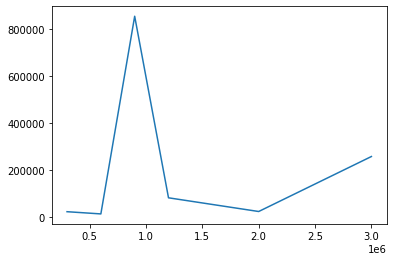

In [24]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()

ax.plot(words_read,ests);

As we can see in the plot is no the expected, so it seems not to follow the Heap's Law

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>